# Colocalization Analysis using Image Processing

In this notebook, we will perform colocalization analysis to identify the overlap between different fluorescence channels in an image, specifically looking at red and green channels.

## Image Source
This example uses an image from Heriche et al:
- **License:** [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)
- **DOI:** [10.1091/mbc.E13-04-0221](https://doi.org/10.1091/mbc.E13-04-0221)
- **Image Link:** [OMERO Image Detail](https://idr.openmicroscopy.org/webclient/img_detail/179719/)

We have downloaded this image and stored it in the `data` folder as `coloc_example.png`.


In [1]:
# First, we import the necessary libraries
from skimage import io, filters, measure
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt


## Load and Visualize the Image
Let's load the image we stored in the `data` directory and visualize it to understand the different channels.

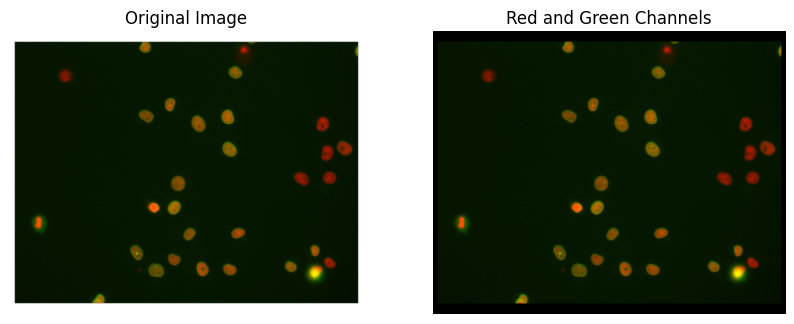

In [2]:
# Load the image using skimage's io.imread
image = io.imread('../data/coloc_example.png')

# Display the image to visualize its structure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')

# Let's extract and visualize the individual channels
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
ax2.imshow(np.stack((red_channel, green_channel, np.zeros_like(red_channel)), axis=-1))
ax2.set_title('Red and Green Channels')
ax2.axis('off')
plt.show()

## Segmenting the Nuclei
To identify the nuclei in the red and green channels, we will use Otsu's thresholding method from scikit-image to segment the channels.

In [3]:
# Apply Otsu's threshold to segment nuclei
red_thresh = filters.threshold_otsu(red_channel)
green_thresh = filters.threshold_otsu(green_channel)

red_nuclei = red_channel > red_thresh
green_nuclei = green_channel > green_thresh


## Label the Segmented Nuclei
We will label the connected regions in the segmented images for further analysis.

In [4]:
# Label connected components in the segmented binary images
red_labels = measure.label(red_nuclei)
green_labels = measure.label(green_nuclei)

# Logical AND to find common areas/nuclei
common_nuclei = np.logical_and(red_nuclei, green_nuclei)
common_labels = measure.label(common_nuclei)

# Compute number of nuclei
red_nuclei_count = np.unique(red_labels[red_labels > 0]).size
common_nuclei_count = np.unique(common_labels[common_labels > 0]).size

# Compute the ratio of colocalized (red AND green) nuclei
ratio = common_nuclei_count / red_nuclei_count if red_nuclei_count > 0 else 0

print(f"Number of red nuclei: {red_nuclei_count}")
print(f"Number of colocalized nuclei (red & green): {common_nuclei_count}")
print(f"Ratio of colocalized nuclei: {ratio:.2f}")

Number of red nuclei: 33
Number of colocalized nuclei (red & green): 24
Ratio of colocalized nuclei: 0.73


## Conclusion
We have successfully segmented the nuclei in different fluorescence channels and determined the ratio of colocalized nuclei using scikit-image in Python. We specifically used image thresholding and logical operations for this colocalization analysis, which highlights the areas where different fluorescence signals overlap.